In [16]:
import numpy as np
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
print(data[45:55])

[[4.8 3.  1.4 0.3 0. ]
 [5.1 3.8 1.6 0.2 0. ]
 [4.6 3.2 1.4 0.2 0. ]
 [5.3 3.7 1.5 0.2 0. ]
 [5.  3.3 1.4 0.2 0. ]
 [7.  3.2 4.7 1.4 1. ]
 [6.4 3.2 4.5 1.5 1. ]
 [6.9 3.1 4.9 1.5 1. ]
 [5.5 2.3 4.  1.3 1. ]
 [6.5 2.8 4.6 1.5 1. ]]


In [4]:
import numpy as np
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]


# predict    
def predict(x, W, b):
    return tf.math.softmax(tf.matmul(x, W) + b)

    
### weights
W = tf.Variable(tf.random.normal((4, 3), dtype=tf.float64))
b = tf.Variable(tf.random.normal((3,), dtype=tf.float64))

### training
learning_rate = 0.1
num_epochs = 200

### loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X, W, b)
        
        # loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [W, b])
        
        # update
        W.assign_sub(learning_rate * dW) 
        b.assign_sub(learning_rate * db)

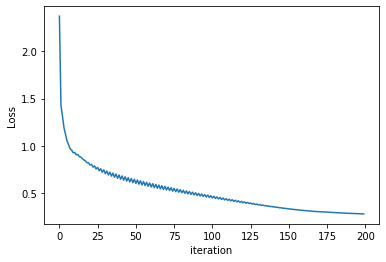

In [6]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [14]:
preds = predict(X, W, b)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

print(predicted_class.shape)
print(y.shape)
y = y.reshape((150,))
print(y.shape)

acc = np.mean(predicted_class == y)
print(acc.mean())

(150,)
(150, 1)
(150,)
0.94
